# SUPPORT VECTOR MACHINE

### Import libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

### Import the dataset

In [2]:
df = pd.read_csv('winequality-red.csv') # Wine dataset

### Dataset Analysis


In [3]:
print(df.head()) # Check the dataset header
df.info()
df['quality'].value_counts()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Exploratory Data Analysis

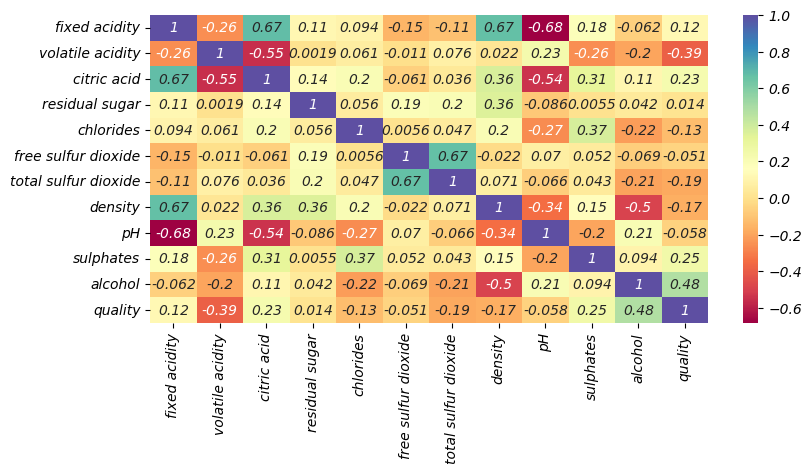

In [4]:
plt.figure(figsize = (9,4))
sns.heatmap(df.corr(), cmap='Spectral', annot = True);

In [5]:
# Drop variables with least correlation
df.drop(["residual sugar", "free sulfur dioxide", "pH"], axis = 1, inplace = True) 

In [6]:
# Converting quality variable into good/bad
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [7]:
# Converting good/bad values into numbers
new_quality = LabelEncoder()
df['quality'] = new_quality.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


### SVC MODEL

In [8]:
y = df['quality']                       # This is the target
x = df.drop(['quality'], axis = 1)      # 

### Splitting data

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### Scaling data

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Instantiate the model

In [11]:
svc_model = SVC()

### Training the model

In [12]:
svc_model.fit(X_train, Y_train)

SVC()

### Predicting values

In [13]:
Y_pred = svc_model.predict(X_test)

### Crossvalidation

[0.8984375  0.890625   0.8984375  0.875      0.8984375  0.8359375
 0.8828125  0.8515625  0.890625   0.91338583]
[[271   8]
 [ 25  16]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       279
           1       0.67      0.39      0.49        41

    accuracy                           0.90       320
   macro avg       0.79      0.68      0.72       320
weighted avg       0.88      0.90      0.88       320



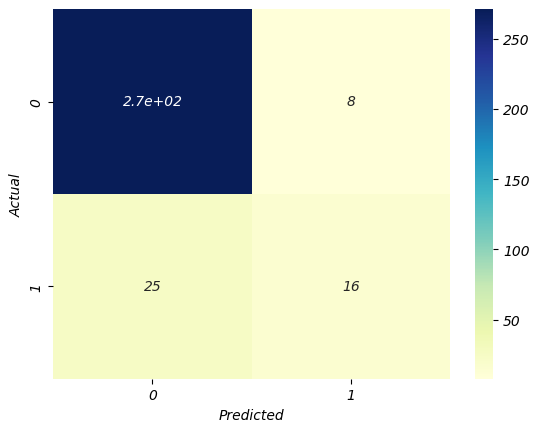

In [14]:
cv_scores = cross_val_score(estimator = svc_model, X = X_train, y = Y_train, cv = 10)
print(cv_scores)

print(confusion_matrix(Y_test, Y_pred))

cnf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
print(classification_report(Y_test, Y_pred))

### Hyperparameter Optimization


In [15]:
svc_model2 = SVC()
svc_params = {"C":[.1, 1, 10],
             "gamma":[1, 0.1, 0.01],
             "kernel":['poly', 'rbf']}

svc_cv_model = GridSearchCV(estimator = svc_model2, param_grid = svc_params, cv = 10, n_jobs=-1)
svc_cv_model.fit(X_train, Y_train)

svc_cv_model.best_params_ # The best parameters obtained

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

### Using the tuned parameters


[0.8984375  0.890625   0.8984375  0.875      0.8984375  0.8359375
 0.8828125  0.8515625  0.890625   0.91338583]


Text(0.5, 23.52222222222222, 'Predicted')

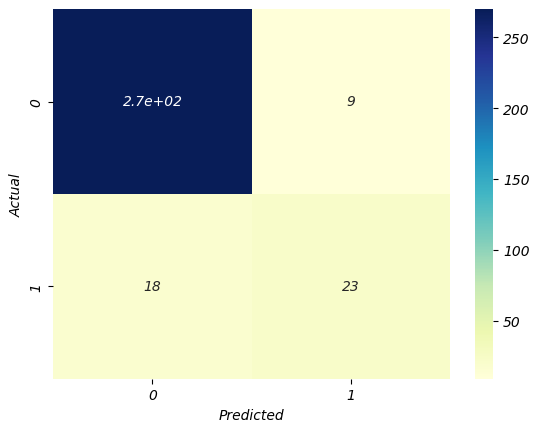

In [16]:
svc_tuned = SVC(C=3, gamma=1, kernel='rbf')
svc_tuned.fit(X_train, Y_train)

Y_pred = svc_tuned.predict(X_test)
cv_scores = cross_val_score(estimator = svc_model, X = X_train, y = Y_train, cv = 10)
print(cv_scores)

cnf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')